In [1]:
#importing required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
#import tensorflow.compat.v2 as tf
#import tensorflow_datasets as tfds
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle


In [2]:
# reading the csv file and defining columns
dataset = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = 'latin', names = ['polarity','id','date','query','user','Comment']) 
sentiment_label = dataset['polarity']
tweet_comments = dataset['Comment']
X_train, X_test, y_train, y_test = train_test_split(sentiment_label, tweet_comments)

In [3]:
dataset = dataset.sample(frac=1)
dataset = dataset[:300000]


In [4]:
dataset.shape

(300000, 6)

In [5]:
dataset.head(10)

,polarity,id,date,query,user,Comment
235871,0,1979864555,Sun May 31 04:48:56 PDT 2009,NO_QUERY,calethea,I'm back! I miss it already
44353,0,1676840485,Fri May 01 23:24:03 PDT 2009,NO_QUERY,knowlt22,Bed soon. need to study SO much tom.
17927,0,1556441640,Sat Apr 18 22:51:10 PDT 2009,NO_QUERY,jessicaasheets,@moriahsallis I don't want you to move but I ...
761359,0,2297203195,Tue Jun 23 10:09:10 PDT 2009,NO_QUERY,TokioSpice,Shout to AxSyn. You are not the only one not g...
976649,4,1833655255,Mon May 18 00:00:15 PDT 2009,NO_QUERY,TheDarrenxshow,@TheDarrenxshow I'm not sure if that's post-ra...
691652,0,2252295490,Sat Jun 20 05:56:42 PDT 2009,NO_QUERY,imcalledCath,today sucks. it's raining. i wish i waas going...
1008109,4,1880766672,Fri May 22 02:25:42 PDT 2009,NO_QUERY,viktornord,@ClearWiMax4U You said it right! I'm fine than...
1118843,4,1973673001,Sat May 30 11:36:32 PDT 2009,NO_QUERY,dressjunkie,@he1e thats so funny. Very un PC I'm terrifi...
238142,0,1980349662,Sun May 31 06:29:04 PDT 2009,NO_QUERY,justagirl86,"had a very intense drama filled night, i swear..."
336719,0,2014059343,Wed Jun 03 00:20:28 PDT 2009,NO_QUERY,NINJAxDEE,"woah no transformers is over, and that stupid..."


In [6]:
dataset['polarity'].unique()


array([0, 4], dtype=int64)

<AxesSubplot:xlabel='polarity', ylabel='count'>

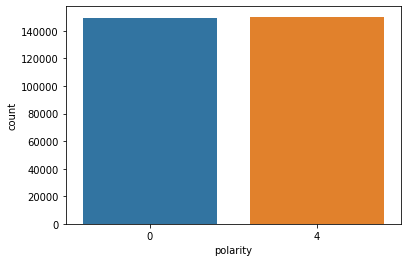

In [7]:
sns.countplot(dataset['polarity'])

In [8]:
dataset.describe()

,polarity,id
count,300000.000000,3.000000e+05
mean,2.004173,1.998174e+09
std,1.999999,1.941305e+08
min,0.000000,1.467810e+09
25%,0.000000,1.956774e+09
50%,4.000000,2.002054e+09
75%,4.000000,2.176961e+09
max,4.000000,2.329205e+09


In [9]:
#getting the number of positive and negative comments
negative_tweets = dataset['polarity'][dataset.polarity == 0]
positive_tweets = dataset['polarity'][dataset.polarity == 4]

print(f'Number of Positive labeled texts are {len(positive_tweets)}')
print(f'Number of Negative labeled texts are {len(negative_tweets)}')

Number of Positive labeled texts are 150313
Number of Negative labeled texts are 149687


In [10]:
def count_words(text):
  return len(text.split())

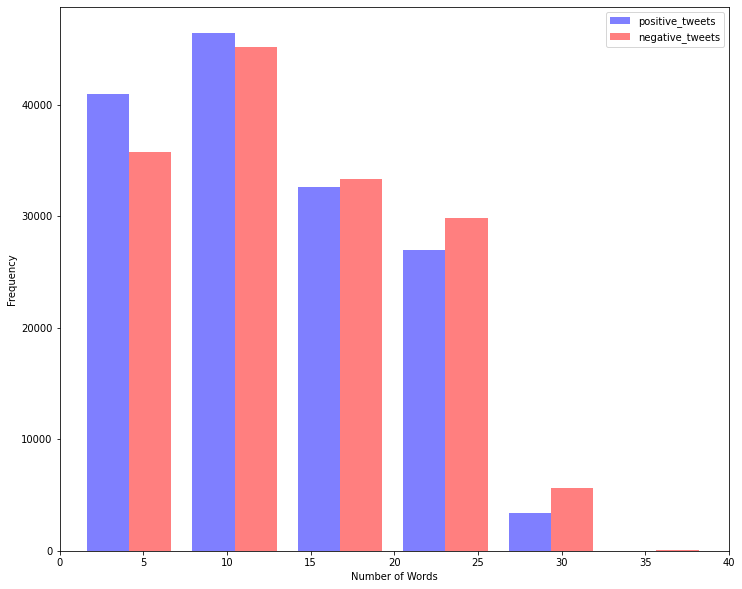

In [11]:
#creating the visualization for positive and negative tweets
dataset['Number of Words'] = dataset['Comment'].apply(count_words)
positive = dataset['Number of Words'][dataset.polarity == 4]
negative = dataset['Number of Words'][dataset.polarity == 0]
plt.figure(figsize=(12,10))
plt.xlim(0,40)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
graph = plt.hist([positive, negative], color = ['blue', 'red'], alpha = 0.5, label = ['positive_tweets','negative_tweets'] )
plt.legend(loc = 'upper right')

In [12]:
#dropping unnecessary data columns
dataset.drop(['date','query','user','Number of Words'], axis = 1, inplace = True)

In [13]:
dataset.drop('id', axis =1, inplace =True)

In [14]:
#Checking if any null values present
dataset.isnull().sum() 

polarity    0
Comment     0
dtype: int64

In [15]:
dataset['Comment'] = dataset['Comment'].astype('str')

In [16]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{"mustn't", "wasn't", 'after', 'there', 'an', 'very', 'don', 'too', 'haven', 'herself', "that'll", 'yourself', 'can', 'd', 'while', "aren't", 'the', 'between', 'our', "isn't", 'until', 'o', 'just', 'down', 'yourselves', 'do', 'with', 'on', 'their', "couldn't", 'by', 'had', 'her', 'mustn', 'himself', 'ours', 'we', 'each', 'than', 'hasn', 'why', "haven't", 'it', 'does', 'did', 'whom', 't', 'both', 'is', "don't", 'nor', 'during', 'mightn', 'needn', 'm', 'below', 'so', 'she', 'and', 'shan', 'some', 'll', 'off', 'having', "weren't", 'wouldn', 'few', 'further', "you've", 'against', "should've", 'no', 'shouldn', "mightn't", 're', 'all', 'over', 'doesn', 'now', 'to', 'theirs', 'in', "you'd", 'through', 'isn', 'more', 'under', 'from', 'they', 'my', "shouldn't", "she's", 'has', 'not', "hadn't", 'which', 'was', 'being', 'where', 'but', "wouldn't", 'or', 'hadn', 'itself', "needn't", 'themselves', 'this', 'that', 've', 'as', 'should', 'again', 'its', 'have', "shan't", 'your', 'up', 'won', 'for', 'y

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhavs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhavs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhavs\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
urlCharacters = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userCharacters = '@[^\s]+'
def preprocess_data(text):
    # Lower Casing
    text = text.lower()
    text=text[1:]
    # Removing all URls 
    text = re.sub(urlCharacters,'',text)
    # Removing all @username.
    text = re.sub(userCharacters,'', text) 
    #Remove punctuations
    text = text.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(text)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    final_text=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        final_text.append(word)
    return ' '.join(final_text)

In [19]:
dataset['processed_tweets'] = dataset['Comment'].apply(lambda x: preprocess_data(x))
print('Preprocessing done sucessfully.')

Preprocessing done sucessfully.


In [20]:
dataset.head(10)

,polarity,Comment,processed_tweets
235871,0,I'm back! I miss it already,back miss already
44353,0,Bed soon. need to study SO much tom.,ed soon need study much tom
17927,0,@moriahsallis I don't want you to move but I ...,moriahsallis dont want move come see
761359,0,Shout to AxSyn. You are not the only one not g...,hout axsyn one getting tweet piss
976649,4,@TheDarrenxshow I'm not sure if that's post-ra...,thedarrenxshow im sure thats postracist racist...
691652,0,today sucks. it's raining. i wish i waas going...,oday suck raining wish waas going see tonight
1008109,4,@ClearWiMax4U You said it right! I'm fine than...,clearwimax4u said right im fine thank
1118843,4,@he1e thats so funny. Very un PC I'm terrifi...,he1e thats funny un pc im terrified dwarf
238142,0,"had a very intense drama filled night, i swear...",ad intense drama filled night swear boy tempre...
336719,0,"woah no transformers is over, and that stupid...",oah transformer stupid linkin park song playin...


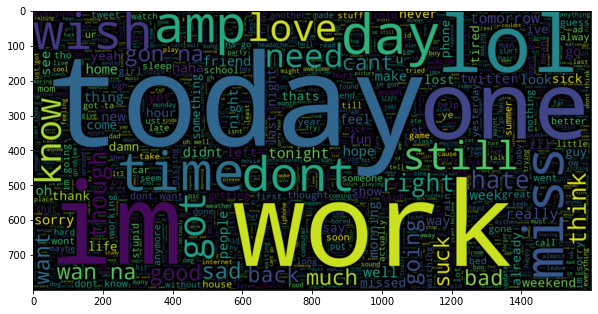

In [21]:
# Word-Clod for Negative tweets
plt.figure(figsize = (10, 10)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(dataset[dataset.polarity == 0].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

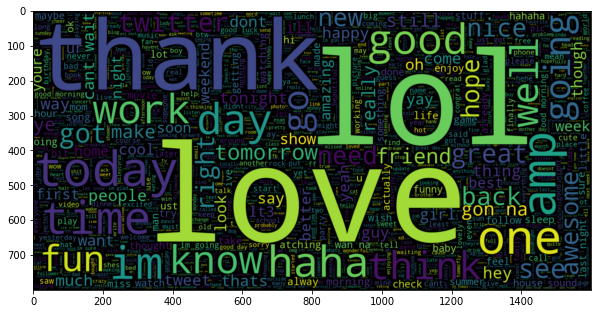

In [22]:
# Word-Cloud for Positive tweets
plt.figure(figsize = (10, 10)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(dataset[dataset.polarity == 4].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

In [23]:
X = dataset['processed_tweets'].values
y = dataset['polarity'].values

In [24]:
print(X.shape)
print(y.shape)

(300000,)
(300000,)


In [25]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names()))

Vector fitted.
No. of feature_words:  230270


In [26]:
print(X.shape)
print(y.shape)

(300000, 230270)
(300000,)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=104)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (210000, 230270)
y_train (210000,)

X_test (90000, 230270)
y_test (90000,)


In [28]:
def model_Evaluate(model):
    #accuracy of model on training data
    accuracy_train=model.score(X_train, y_train)
    #accuracy of model on test data
    accuracy_test=model.score(X_test, y_test)
    
    print('Accuracy of model on training data : {}'.format(accuracy_train*100))
    print('Accuracy of model on testing data : {} \n'.format(accuracy_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':12}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':12}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':12}, pad = 20)

Accuracy of model on training data : 83.26761904761905
Accuracy of model on testing data : 77.17444444444445 

              precision    recall  f1-score   support

           0       0.79      0.74      0.76     44646
           4       0.76      0.80      0.78     45354

    accuracy                           0.77     90000
   macro avg       0.77      0.77      0.77     90000
weighted avg       0.77      0.77      0.77     90000



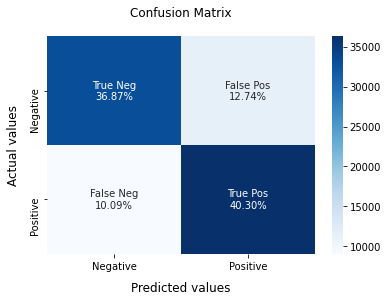

In [29]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
history=lg.fit(X_train, y_train)
model_Evaluate(lg)

Accuracy of model on training data : 92.56428571428572
Accuracy of model on testing data : 76.33777777777779 

              precision    recall  f1-score   support

           0       0.77      0.75      0.76     44646
           4       0.76      0.78      0.77     45354

    accuracy                           0.76     90000
   macro avg       0.76      0.76      0.76     90000
weighted avg       0.76      0.76      0.76     90000



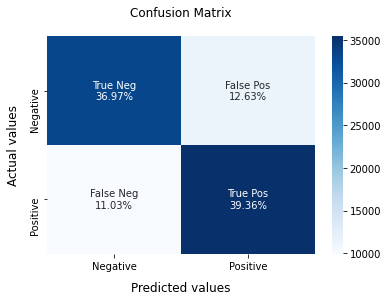

In [30]:
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

Accuracy of model on training data : 86.45761904761905
Accuracy of model on testing data : 76.00666666666666 

              precision    recall  f1-score   support

           0       0.75      0.78      0.76     44646
           4       0.77      0.74      0.76     45354

    accuracy                           0.76     90000
   macro avg       0.76      0.76      0.76     90000
weighted avg       0.76      0.76      0.76     90000



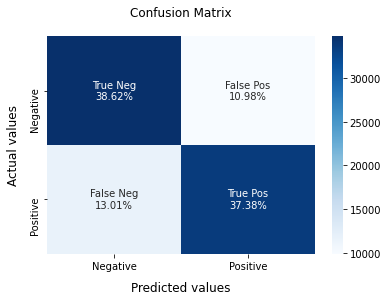

In [31]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

Accuracy of model on training data : 74.98380952380953
Accuracy of model on testing data : 71.14888888888888 

              precision    recall  f1-score   support

           0       0.74      0.64      0.69     44646
           4       0.69      0.78      0.73     45354

    accuracy                           0.71     90000
   macro avg       0.72      0.71      0.71     90000
weighted avg       0.72      0.71      0.71     90000



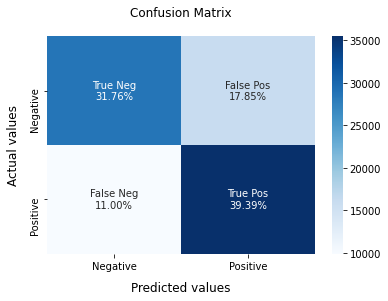

In [32]:
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rf.fit(X_train, y_train)
model_Evaluate(rf)

Accuracy of model on training data : 99.8552380952381
Accuracy of model on testing data : 69.93222222222222 

              precision    recall  f1-score   support

           0       0.69      0.71      0.70     44646
           4       0.71      0.69      0.70     45354

    accuracy                           0.70     90000
   macro avg       0.70      0.70      0.70     90000
weighted avg       0.70      0.70      0.70     90000



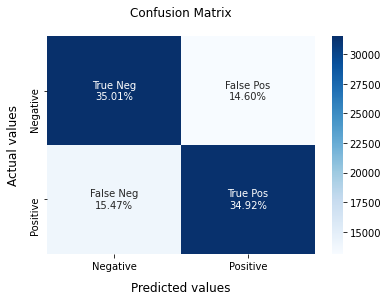

In [33]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state= 1)
decision_tree.fit(X_train, y_train)
model_Evaluate(decision_tree)

[11:44:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of model on training data : 74.88190476190476
Accuracy of model on testing data : 73.23666666666668 

              precision    recall  f1-score   support

           0       0.79      0.63      0.70     44646
           4       0.70      0.83      0.76     45354

    accuracy                           0.73     90000
   macro avg       0.74      0.73      0.73     90000
weighted avg       0.74      0.73      0.73     90000



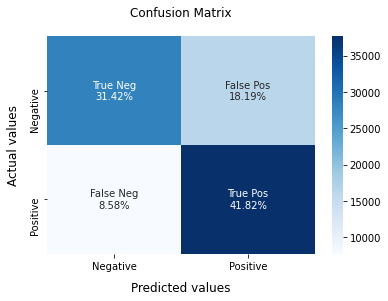

In [34]:
# Fitting XGBoost to the training data
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
model_Evaluate(xgb_model)

LR: 0.772724 (0.003036)
CART: 0.702738 (0.002629)
NB: 0.761824 (0.002371)
SVM: 0.762619 (0.003493)


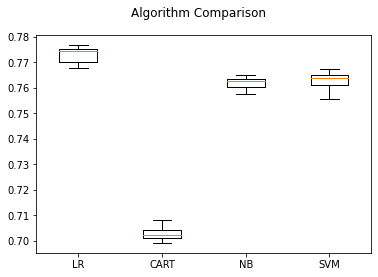

In [35]:
seed=7
from sklearn import model_selection
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', BernoulliNB()))
models.append(('SVM', LinearSVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()